In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
SNS = pd.read_csv("./BigContest_2020/2020빅콘테스트 문제데이터(혁신아이디어분야)/03_SNS데이터(와이즈넛)/2020 bigcontest data_wisenut.csv",
                  encoding="utf-8",engine="python",sep="")

In [3]:
SNS.drop(columns=["GU_NM(삭제)","DONG_NM(삭제)"],inplace=True)

In [25]:
SNS

,SEQ,GU_CD,DONG_CD,NEWS_CNT_201902,NEWS_CNT_201903,NEWS_CNT_201904,NEWS_CNT_201905,NEWS_CNT_202002,NEWS_CNT_202003,NEWS_CNT_202004,...,UP5_NEGATIVE_202004,UP5_NEGATIVE_202005,UP6_NEGATIVE_201902,UP6_NEGATIVE_201903,UP6_NEGATIVE_201904,UP6_NEGATIVE_201905,UP6_NEGATIVE_202002,UP6_NEGATIVE_202003,UP6_NEGATIVE_202004,UP6_NEGATIVE_202005
0,1,140,520,4,6,16,34,26,3,9,...,24,0,7,11,186,5,1,6,0,10
1,2,140,540,4,0,8,27,15,25,5,...,27,17,49,1,63,251,0,58,0,71
2,3,140,550,6,16,29,44,162,45,38,...,35,46,34,74,226,137,17,84,22,326
3,4,140,570,0,1,5,24,2,25,17,...,24,0,1,17,162,14,0,46,22,37
4,5,140,580,13,8,13,34,20,2,17,...,8,17,0,0,199,12,5,0,22,125
5,6,140,590,3,0,0,24,0,0,17,...,0,17,2,0,58,1,0,0,19,48
6,7,140,615,9,18,4,0,9,2,4,...,8,21,78,80,121,4,4,16,3,68
7,8,140,625,2,0,0,0,0,0,0,...,24,17,0,0,41,0,0,0,0,29
8,9,140,635,0,0,0,0,0,0,0,...,24,17,0,0,43,1,0,0,0,29
9,10,140,645,0,0,0,8,0,0,0,...,8,0,0,0,41,1,0,0,0,0


In [5]:
SNS_place = pd.read_excel("./BigContest_2020/2020빅콘테스트 문제데이터(혁신아이디어분야)/03_SNS데이터(와이즈넛)/03_혁신아이디어분야_SNS데이터(와이즈넛)_데이터정의서.xlsx",
                         sheet_name="(참고) 행정동코드",header=1)

In [6]:
SNS_place.drop(columns=['Unnamed: 0'],inplace=True)
SNS_place.head()

,구코드,행정동코드,구명,행정동명
0,140,520,서울 중구,소공동
1,140,540,서울 중구,회현동
2,140,550,서울 중구,명동
3,140,570,서울 중구,필동
4,140,580,서울 중구,장충동


In [7]:
parsed_SNS = []
temp = SNS[SNS.columns[3:]]
while not temp.empty:
    parsed_SNS.append(temp[temp.columns[0:4]])
    temp = temp[temp.columns[4:]]
len(parsed_SNS)

32

In [8]:
Topic_2019 = parsed_SNS.pop(6)
Topic_2020 = parsed_SNS.pop(6)

In [9]:
Topic_2019.head()

,UP_TOPIC_201902,UP_TOPIC_201903,UP_TOPIC_201904,UP_TOPIC_201905
0,"장관,기념식,창간,롯데호텔,뷔페","총동창회,서울대,박물관,월드비전,프로그램","기생충,반민특위,강원도,이재민,푯돌","동계올림픽,은퇴,여제,기자회견,눈물"
1,"회현동,서울역,도시재생,윤동주,일제강점기","남산,케이블카,남산둘레길,국립극장,남산타워","서울지방경찰청,경복궁역,종교교회,용비어천가,종로구","저작권,녹색교통지역,기부채납,최고,인지"
2,"생활유산,열쇠고리,신세계백화점,리뉴얼,관광객","문화재,도시재생사업,을지로,등록문화재,보존","반민특위,푯돌,충무로,생활형숙박시설,하늘N","중구,문화예술인,문화도시,쓰레기,미화원"
3,"저작권,영남상생포럼,자유한국장,지적,그랜드호텔","저작권,다가구주택,주주총회,주식회사,보증금","저작권,등록,기간,매각,유산","비용,주소,등록,신용불량자,유산"
4,"빵집,태극당,신라호텔,세관,감사원","프로포폴,호텔신라,이부진,투약,불법","신부,예비신랑,신라호텔,대학병원,결혼식","덴마크,왕세자,명예시민증,왕세자비,신라호텔"


In [10]:
Topic_2020.head()

,UP_TOPIC_202002,UP_TOPIC_202003,UP_TOPIC_202004,UP_TOPIC_202005
0,"롯데백화점,마포공덕점,프레지던트호텔,코로나바이러스,확진자","직원,롯데호텔,콜센터,코로나,확진자","도시계획위원회,정비계획,재개발구역,서소문,정비수법","창조인상,생명과학부,예술감독,코로나19,RNA"
1,"남산,남촌,중림,고도제한,개발제한","코로나19,남산둘레길,기부 행렬,랜드마크,남녀노소","코로나19,구조조정,산업단지,원장,각하","시민아파트,시범아파트,서울시장,충정아파트,회현"
2,"롯데백화점,코로나바이러스감염증,관광객,소상공인,확진자","확진자,중구,코로나,숙박시설,중국인","학원,코로나,확진자,집단감염,유흥업소","마스크,선별진료소,면마스크,천마스크,확진환자"
3,"인테리어,도배장판,업체,거실,비용","케이블카,남산둘레길,남산타워,국립극장,남산","코로나,업종,감소율,자영업자,재난","코로나19,본점,주류,리스,양도"
4,"호텔신라,한옥호텔,착공,전통호텔,도시계획위원회","호텔신라,이부진,신라면세점,신라호텔,착공","코로나,업종,감소율,자영업자,재난","코로나,신세계조선호텔,브랜드,한옥호텔,특급호텔"


In [72]:
from wordcloud import WordCloud
from collections import Counter

In [73]:
wc = WordCloud(font_path='./NanumBarunGothic.ttf',width=800,height=800,background_color="white")

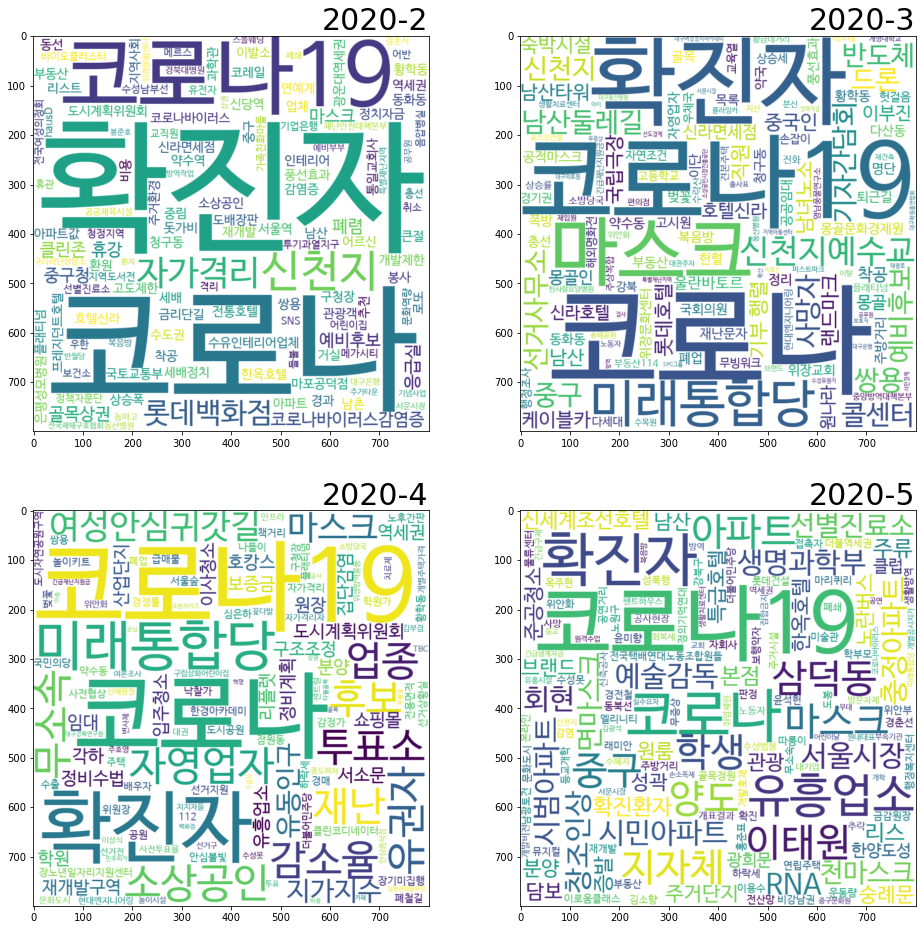

In [97]:
fig = plt.figure(figsize=(16,16))
num = 1

for name in Topic_2020.columns:
    test = ''
    for i in Topic_2020[name]:
        test+=i
        test+=','
    
    test = pd.Series(test.split(','))
    cnt = Counter(test)
    wc = wc.generate_from_frequencies(cnt)
    arr = wc.to_array()
    ax = fig.add_subplot(2,2,num)
    ax.set_title("2020-"+str(num+1),fontsize=30,loc='right')
    ax.imshow(arr,interpolation="bilinear")
    num+=1
    
plt.show()

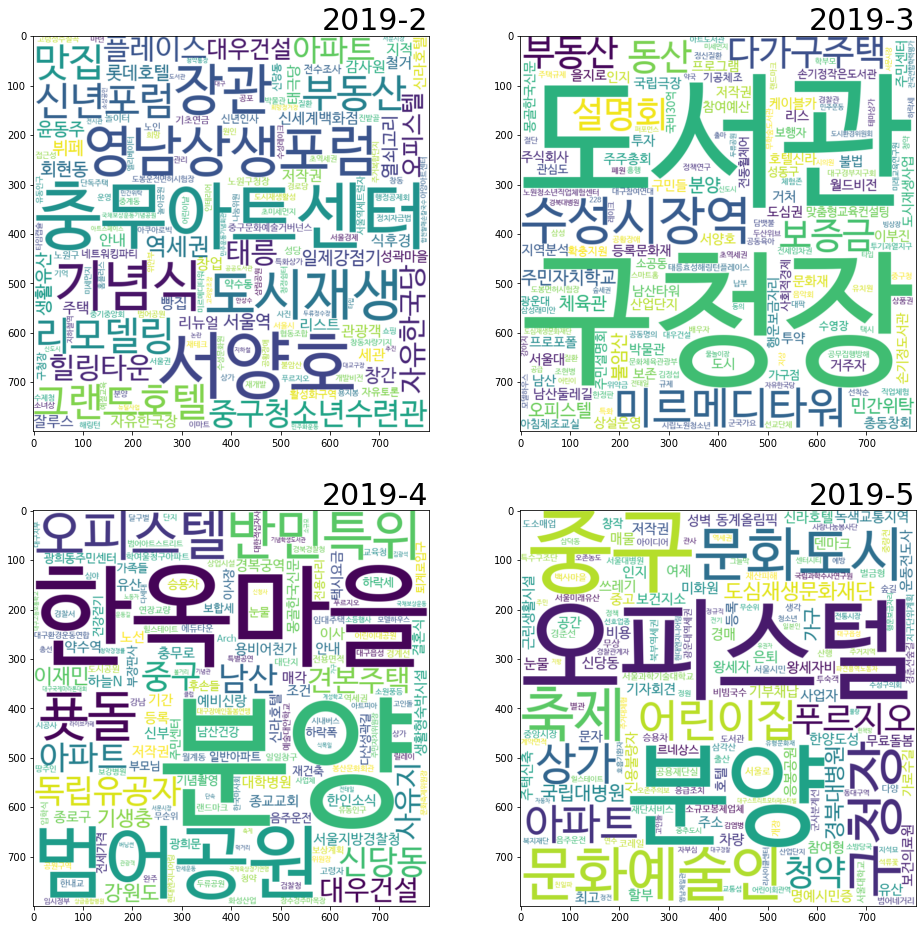

In [98]:
fig = plt.figure(figsize=(16,16))
num = 1

for name in Topic_2019.columns:
    test = ''
    for i in Topic_2019[name]:
        test+=i
        test+=','
    
    test = pd.Series(test.split(','))
    cnt = Counter(test)
    wc = wc.generate_from_frequencies(cnt)
    arr = wc.to_array()
    ax = fig.add_subplot(2,2,num)
    ax.set_title("2019-"+str(num+1),fontsize=30,loc='right')
    ax.imshow(arr,interpolation="bilinear")
    num+=1
    
plt.show()

In [11]:
len(parsed_SNS)

30

In [38]:
SNS_place[["구명","행정동명"]]

,구명,행정동명
0,서울 중구,소공동
1,서울 중구,회현동
2,서울 중구,명동
3,서울 중구,필동
4,서울 중구,장충동
5,서울 중구,광희동
6,서울 중구,신당동
7,서울 중구,다산동
8,서울 중구,약수동
9,서울 중구,청구동


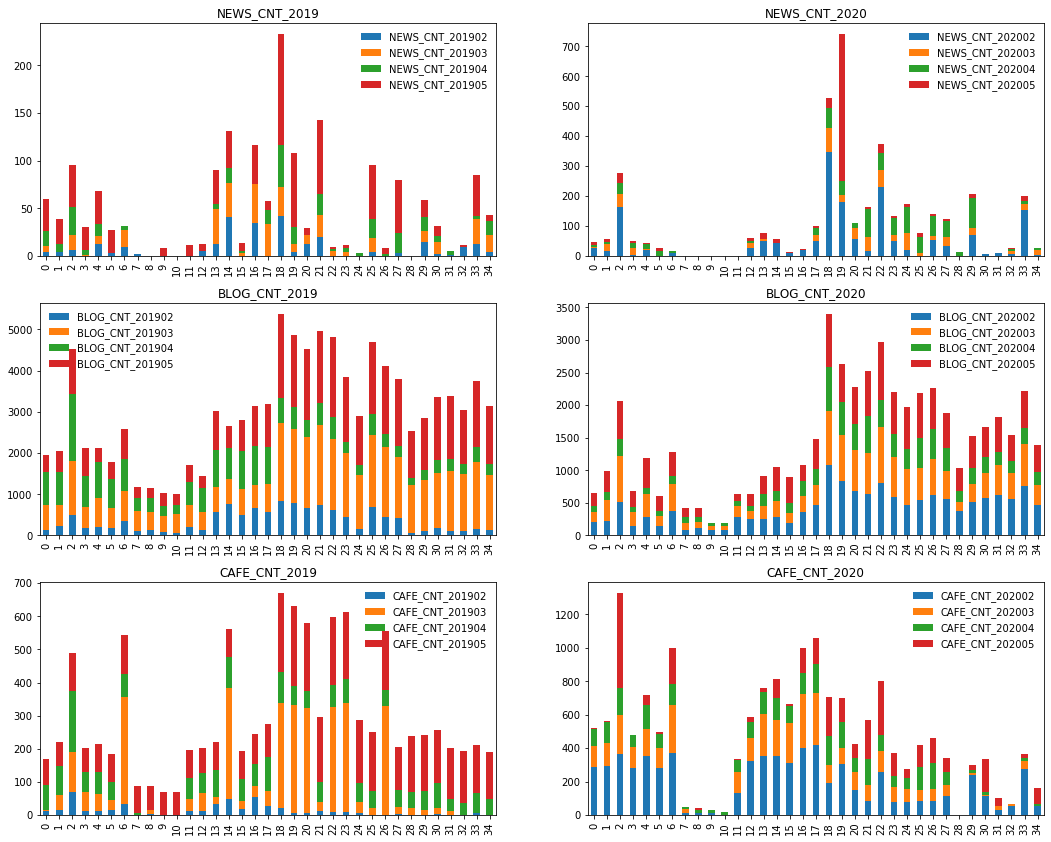

In [41]:
fig = plt.figure(figsize=(18,30))
cnt = 1
for i in parsed_SNS[:6]:
    ax = fig.add_subplot(6,2,cnt)
    plot = i.plot(kind="bar",ax=ax,stacked=True)
    ax.set_title(i.columns[0][:13])
    cnt+=1
    ax.legend(frameon=False,loc = "best")
    
plt.show()

---------------------------------------

# 업종코드  

UP1 - 숙박(10)  
UP2 - 레저업소(21)  
UP3 - 문화취미(22)   
UP4 - 의료기관(70)   
UP5 - 보건위생(71)   
UP6 - 요식업소(80)   
    
POSITVE - 긍정 게시량  
NEGATIVE - 부정 게시량

---------------------------------------

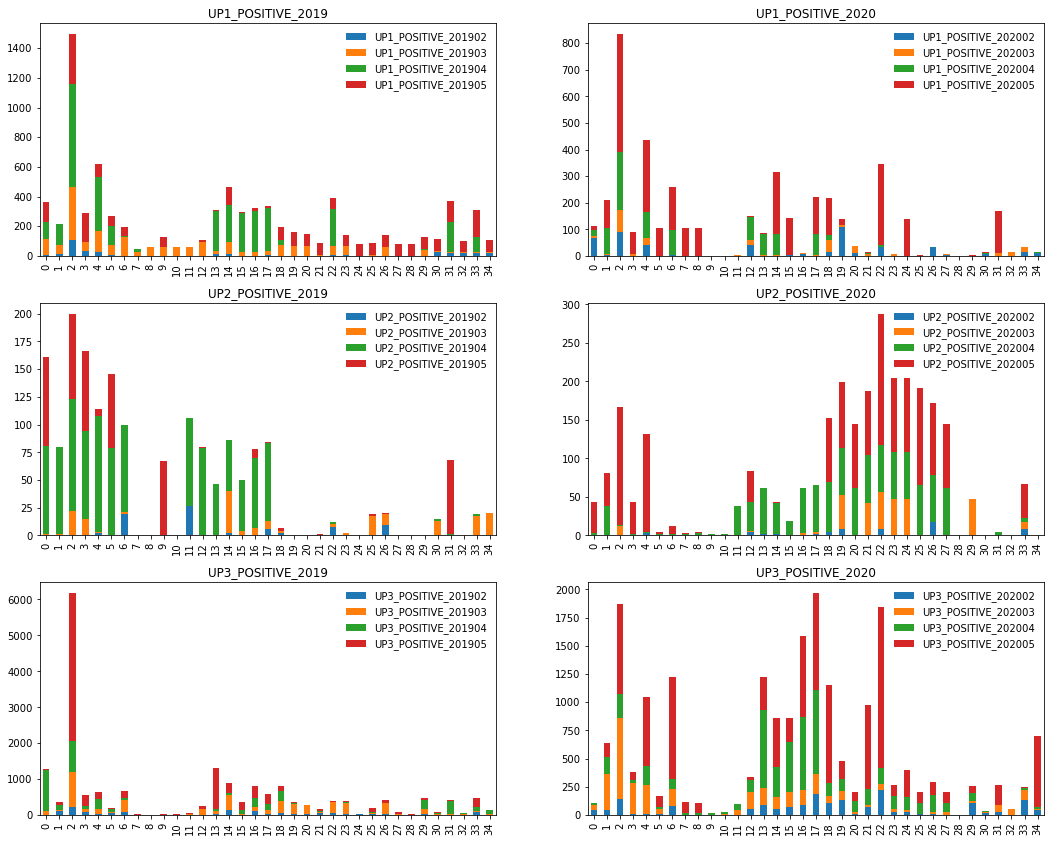

In [46]:
#숙박, 레저, 문화취미
fig = plt.figure(figsize=(18,30))
cnt = 1
for i in parsed_SNS[6:12]:
    ax = fig.add_subplot(6,2,cnt)
    plot = i.plot(kind="bar",ax=ax,stacked=True)
    ax.set_title(i.columns[0][:17])
    cnt+=1
    ax.legend(frameon=False,loc = "best")
    
plt.show()

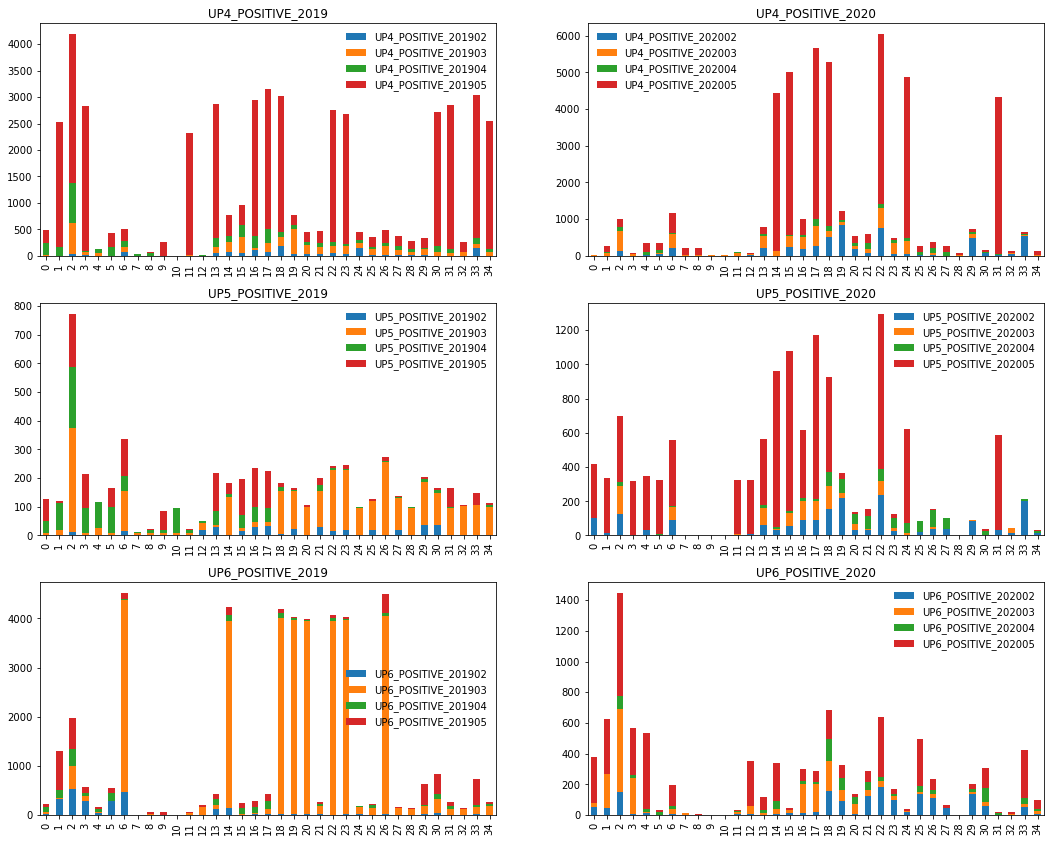

In [47]:
#의료기관, 보건위생, 요식업소
fig = plt.figure(figsize=(18,30))
cnt = 1
for i in parsed_SNS[12:18]:
    ax = fig.add_subplot(6,2,cnt)
    plot = i.plot(kind="bar",ax=ax,stacked=True)
    ax.set_title(i.columns[0][:17])
    cnt+=1
    ax.legend(frameon=False,loc = "best")
    
plt.show()

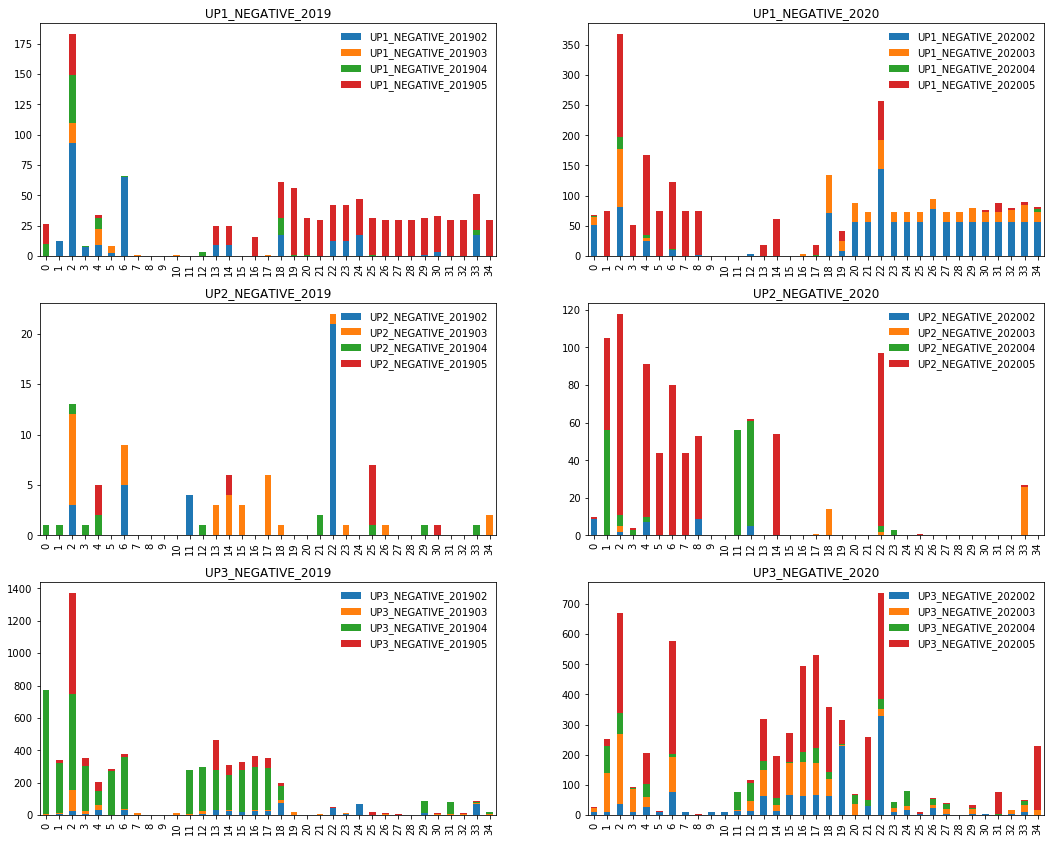

In [48]:
fig = plt.figure(figsize=(18,30))
cnt = 1
for i in parsed_SNS[18:24]:
    ax = fig.add_subplot(6,2,cnt)
    plot = i.plot(kind="bar",ax=ax,stacked=True)
    ax.set_title(i.columns[0][:17])
    cnt+=1
    ax.legend(frameon=False,loc = "best")
    
plt.show()

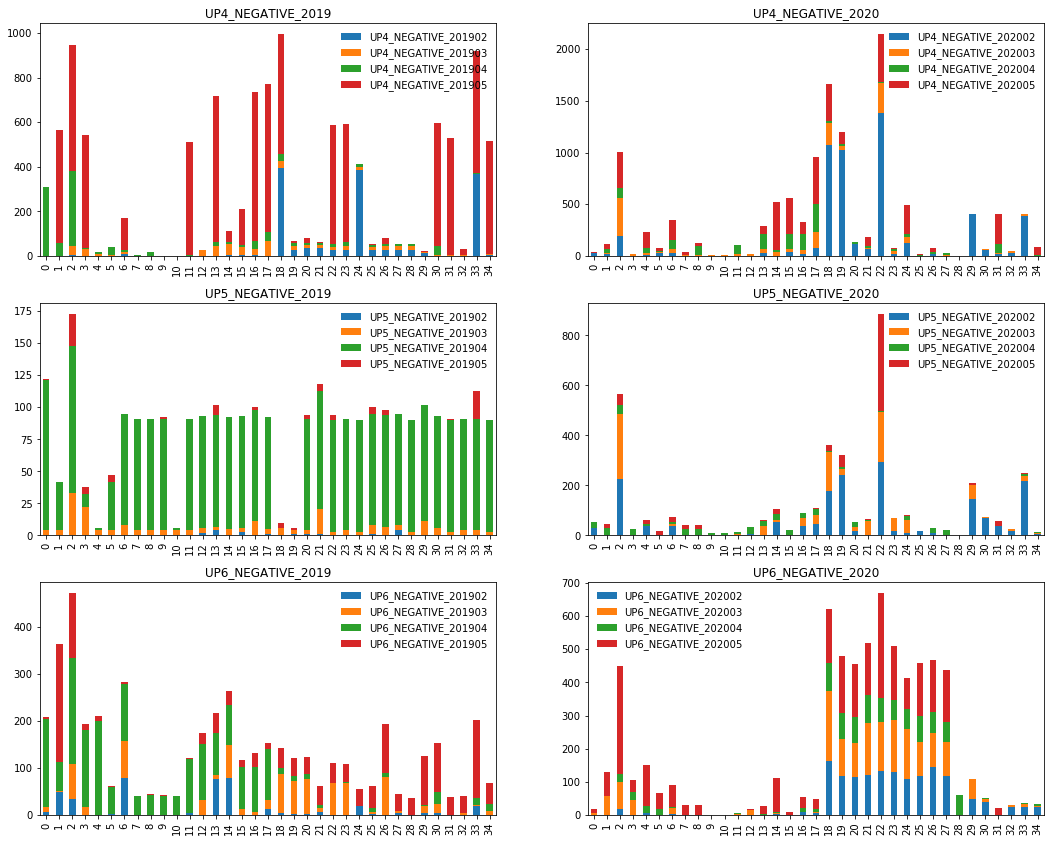

In [50]:
fig = plt.figure(figsize=(18,30))
cnt = 1
for i in parsed_SNS[24:]:
    ax = fig.add_subplot(6,2,cnt)
    plot = i.plot(kind="bar",ax=ax,stacked=True)
    ax.set_title(i.columns[0][:17])
    cnt+=1
    ax.legend(frameon=False,loc = "best")
    
plt.show()